In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv('./Data/team_passing_2013_2022.csv', index_col=0)
df['win_pct'] = df['W'] / (df['W'] + df['L'])
df.head()

,team_abbr,team,G,W,L,passes_made,asst,secondary_asst,potential_asst,year,win_pct
0,ATL,Atlanta Hawks,81,38,43,320.2,24.9,3.1,50.5,2013-14,0.469136
1,BOS,Boston Celtics,82,25,57,297.9,21.0,2.4,45.6,2013-14,0.304878
2,BKN,Brooklyn Nets,81,43,38,292.6,20.7,2.6,44.1,2013-14,0.530864
3,CHA,Charlotte Bobcats,81,42,39,322.0,21.8,3.1,45.6,2013-14,0.518519
4,CHI,Chicago Bulls,82,48,34,317.8,22.7,3.2,50.3,2013-14,0.585366


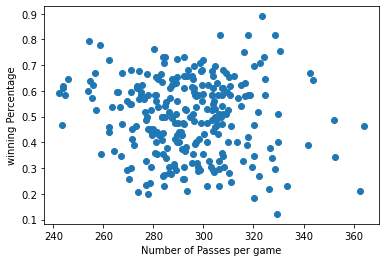

In [3]:
plt.scatter(x = df['passes_made'], y = df['win_pct'])
plt.xlabel('Number of Passes per game')
plt.ylabel('winning Percentage');

In [4]:
df.corr()

# interesting here that secondary assists have a higher correlation to winning than passes made, or assists.  
# some background on what a secondary assist is: https://www.nba.com/news/stephen-curry-warriors-lead-the-nba-in-secondary-assists

,G,W,L,passes_made,asst,secondary_asst,potential_asst,win_pct
G,1.000000,0.238649,0.141668,0.149034,-0.259850,-0.072321,0.027866,0.067548
W,0.238649,1.000000,-0.927503,-0.051451,0.266083,0.441409,0.145499,0.983302
L,0.141668,-0.927503,1.000000,0.109816,-0.371263,-0.477797,-0.137590,-0.976345
passes_made,0.149034,-0.051451,0.109816,1.000000,0.150995,0.332782,0.375089,-0.085332
asst,-0.259850,0.266083,-0.371263,0.150995,1.000000,0.646658,0.662899,0.317534
secondary_asst,-0.072321,0.441409,-0.477797,0.332782,0.646658,1.000000,0.492702,0.464149
potential_asst,0.027866,0.145499,-0.137590,0.375089,0.662899,0.492702,1.000000,0.138606
win_pct,0.067548,0.983302,-0.976345,-0.085332,0.317534,0.464149,0.138606,1.000000


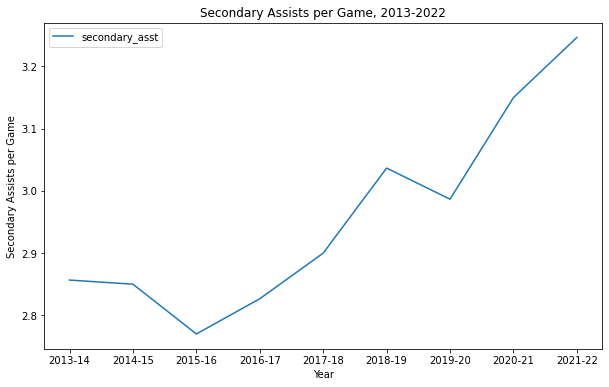

In [5]:
plt.figure(figsize = (10,6))
df.groupby('year')['secondary_asst'].mean().plot(legend=True)
plt.ylabel('Secondary Assists per Game')
plt.xlabel('Year')
plt.title('Secondary Assists per Game, 2013-2022')
plt.savefig('./Visuals/Secondary Assists Per Game.png');

# secondary assists are up 10% over the last decade.  A reaction to the 2014 Spurs perhaps?

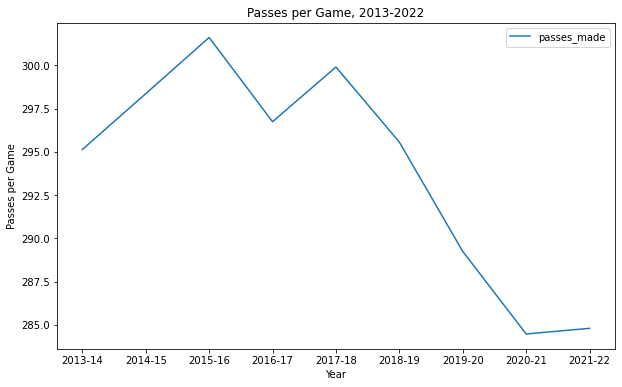

In [6]:
# interesting that while secondary assists are up, total passes are down a few percent.
# so its not just that teams are passing more.  they're not.  they're passing with a purpose, foregoing good looks in favor of great looks.

plt.figure(figsize = (10,6))
df.groupby('year')['passes_made'].mean().plot(legend=True)
plt.ylabel('Passes per Game')
plt.xlabel('Year')
plt.title('Passes per Game, 2013-2022')
plt.savefig('./Visuals/Passer per game.png');

C:\Users\aorfa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


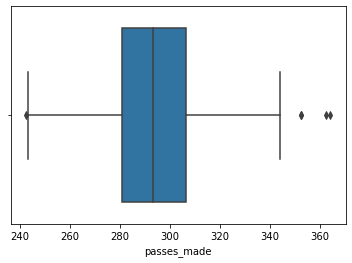

In [7]:
sns.boxplot(df['passes_made']);